<a href="https://colab.research.google.com/github/NienkevanHeek/winc_assignments/blob/WINC-assignments/Final_Assignment_Global_CO2_Emissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
path = "/content/drive/MyDrive/Databestanden/co2_emissions(5).csv"
df = pd.read_csv(path)

#check if file works
df.head()

#rename column names
df.columns = ['country', '1990', '2005', '2017', '2021']

#removing rows that are not countries, I assume that this means rows 0-2 (World), 67 (EU). I'll use drop for removing those rows.
#the data for india looks like a faulty entry, compared to the other data for India and also when compared to Wikipedia data. I therefore changed the entry from 605968.000 to 605.968.
df.drop([0, 1, 2, 67], axis=0, inplace=True)
df.at[93, '1990'] = 605.968

#check
df

,country,1990,2005,2017,2021
3,Afghanistan,2.546,1.063,11.422,8.35
4,Albania,6.583,4.196,5.026,4.59
5,Algeria,65.677,98.197,159.929,173.00
6,Angola,5.851,15.975,30.876,24.45
7,Anguilla,0.006,0.014,0.028,0.03
...,...,...,...,...,...
207,Vietnam,20.182,99.231,218.729,321.41
208,Western Sahara,0.144,0.227,0.276,0.24
209,Yemen,6.887,21.768,12.503,12.05
210,Zambia,2.955,2.457,4.967,7.01


**Graph 1: CO2 of the bigger countries**

Make a graph of the CO2 emissions of the 5 biggest CO2 producers in the world (based on the latest measurement). The x-axis should be the years of 1990, 2005 and 2017. If newer datapoints are added in the future please include them as well. The y-axis should represent the fossil CO2 emissions in Mt CO2 for the given years.

In [ ]:
#1. Find the top 5 countries that have the highest CO2 production in 2021
#2. Slice the top 5 countries and store them in top5_countries
#3. Use the data to create a graph
top5_countries = df.sort_values(by=['2021'], ascending=False).head(5)
top5_countries

,country,1990,2005,2017,2021
42,China,2397.048,6263.064,10877.218,12466.32
202,United States,5085.897,5971.571,5107.393,4752.08
93,India,605.968,1210.754,2454.774,2648.78
158,Russia,2378.921,1733.950,1764.866,1942.54
102,Japan,1149.400,1276.863,1320.776,1084.69


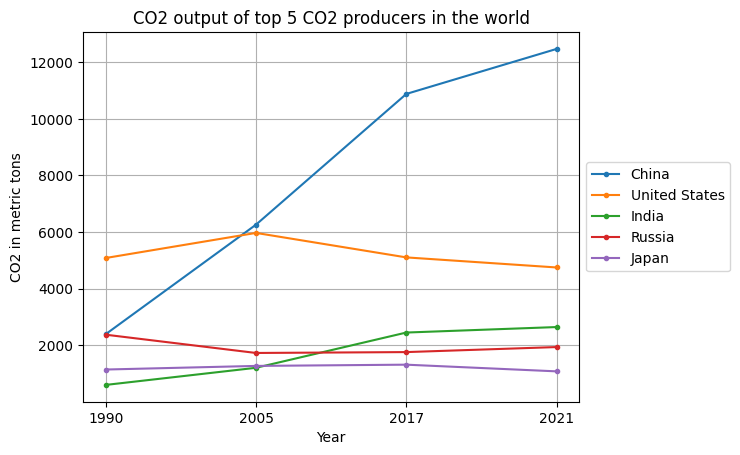

In [ ]:
#I chose a line graph with dots
fig, ax = plt.subplots()
years = top5_countries.columns[1:]

for index, row in top5_countries.iterrows():
  plt.plot(years, row[1:], '.-', label = row[0])

plt.title("CO2 output of top 5 CO2 producers in the world")
plt.xlabel("Year")
plt.ylabel("CO2 in metric tons")
plt.grid()
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))

plt.show()

**Graph 2: worst and best changers**

Because of climate change it's important that we curb our carbon dioxide emissions. So some countries will have lowered their emissions while others may have increased their emissions. Some countries will have better results in doing this than others. If we calculate the relative change and sort by that change we'll get a list with countries that are changing for the better at one end and countries that are changing less well on the other end.

Find the top three and bottom three countries with regards to lowering these emissions and plot their results.

The x-axis should have be the years of 1990, 2005 and 2017. If newer datapoints are added in the future please include them as well. The y-axis should represent the relative amount of CO2 emitted where the measurement in 1990 is 100%.

An example: Afghanistan emitted 2546Mt of CO2 in 1990 (which is the 100%). The relative amount in 2005 would be 1063/2546 * 100 = 41.75%. The relative amount in 2017 would be 11.422/2546 * 100 = 448.62%. So if Afghanistan is on the chart the line would go down first and then back up again.

You may get some really small countries if you look at the relative change. This can distort the chart a lot. To create a more useful chart: now create the same chart for all countries that had at least five Mt of CO2 emissions in 1990.


In [ ]:
#1. Calculate the percentage of CO2 output compared to 1990 for 1990, 2005, 2017, 2020 and store them in new columns.
#2. Reindex the columns, so that we can create a new frame that has the country, and the percentage_of.
#3. Sort and use tail/head to make two tables; one has the three countries with the highest decrease in CO2, the other the countries with the highest increase in CO2
#4. Plot the results
#5. NB. Normally, relative change would be calculated as [Relative change = (new_value - old_value)/old_value * 100]. According to the examples in the assignment, however, relative percentage of original is meant.

df['relative percentage 1990'] = (df.loc[:, '1990']/df.loc[:, '1990']) * 100
df['relative percentage 2005'] = (df.loc[:, '2005']/df.loc[:, '1990']) * 100
df['relative percentage 2017'] = (df.loc[:, '2017']/df.loc[:, '1990']) * 100
df['relative percentage 2021'] = (df.loc[:, '2021']/df.loc[:, '1990']) * 100

df_percentages = df.reindex(columns=['country','relative percentage 1990', 'relative percentage 2005','relative percentage 2017', 'relative percentage 2021'])
highest_reduction = df_percentages.sort_values(by=['relative percentage 2021'], ascending=True).head(3)
highest_increase = df_percentages.sort_values(by=['relative percentage 2021'], ascending=False).head(3)

highest_increase

,country,relative percentage 1990,relative percentage 2005,relative percentage 2017,relative percentage 2021
81,Greenland,100.0,21033.333333,17266.666667,15333.333333
109,Laos,100.0,491.943128,1335.545024,9744.075829
62,Equatorial Guinea,100.0,3475.257732,2545.360825,7216.494845


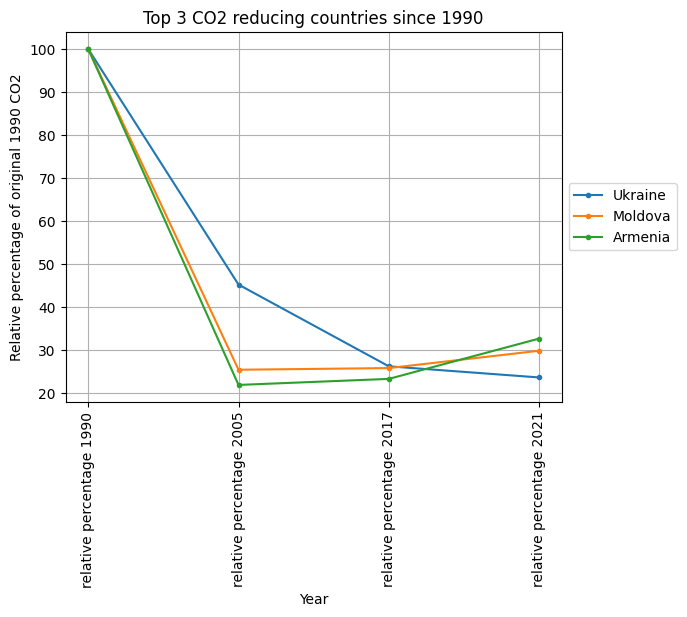

In [ ]:
#This shows a graph of the countries that had the highest reduction in CO2 between 1990 and 2021.
fig, ax = plt.subplots()
for index, row in highest_reduction.iterrows():
  plt.plot(highest_reduction.columns[1:], row[1:],".-", label = row[0])
plt.title("Top 3 CO2 reducing countries since 1990")
plt.xlabel("Year")
plt.ylabel("Relative percentage of original 1990 CO2")
plt.grid()
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.xticks(rotation=90)

plt.show()

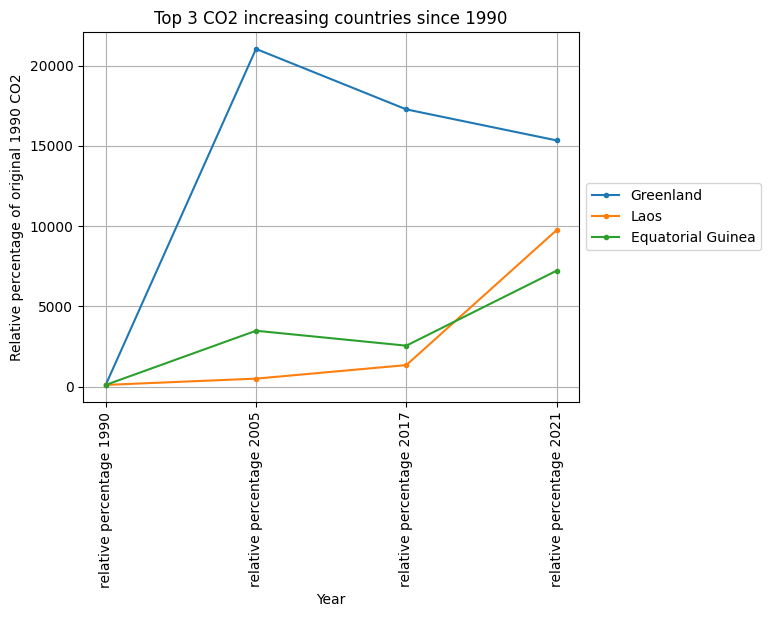

In [ ]:
#This shows the countries that had the highest increase in CO2 production since 1990

fig, ax = plt.subplots()
for index, row in highest_increase.iterrows():
  plt.plot(highest_increase.columns[1:], row[1:],".-", label = row[0])
plt.title("Top 3 CO2 increasing countries since 1990")
plt.xlabel("Year")
plt.ylabel("Relative percentage of original 1990 CO2")
plt.grid()
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.xticks(rotation=90)

plt.show()

In [ ]:
# Now we want to look at the highest increase in countries with at least 5 megatons of CO2 production in 1990. For decreasing countries, the top3 stays the same!
corrected_for_CO2mt = df.loc[df['1990'] >= 5.0]
corrected_for_CO2mt = corrected_for_CO2mt.reindex(columns=['country','relative percentage 1990', 'relative percentage 2005','relative percentage 2017', 'relative percentage 2021'])
corrected_for_CO2mt = corrected_for_CO2mt.sort_values(by=['relative percentage 2021'], ascending=False).head(3)
corrected_for_CO2mt


,country,relative percentage 1990,relative percentage 2005,relative percentage 2017,relative percentage 2021
207,Vietnam,100.0,491.680706,1083.782579,1592.557725
144,Oman,100.0,277.381353,659.887243,796.196567
17,Bangladesh,100.0,280.025959,609.648111,770.623017


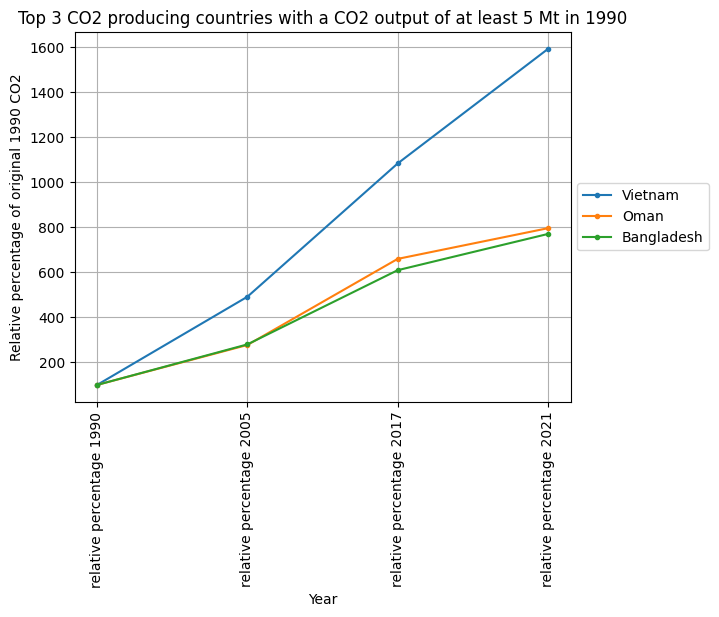

In [ ]:
#And if we make the graph, it looks like this:
fig, ax = plt.subplots()
for index, row in corrected_for_CO2mt.iterrows():
  plt.plot(corrected_for_CO2mt.columns[1:], row[1:],".-", label = row[0])
plt.title("Top 3 CO2 producing countries with a CO2 output of at least 5 Mt in 1990")
plt.xlabel("Year")
plt.ylabel("Relative percentage of original 1990 CO2")
plt.grid()
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.xticks(rotation=90)

plt.show()
